In [1]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Train and Test Data 
cards = '/Users/ceo/Desktop/'
cardsdf=  pd.read_csv(cards + 'creditcard.csv') 
cardsdf.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
Fraud = cardsdf[cardsdf['Class']==1]

Normal = cardsdf[cardsdf['Class']==0]

In [14]:
Fraud = cardsdf[cardsdf['Class']==1]
Valid = cardsdf[cardsdf['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

# LocalOutlierFactor

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
from statistics import mean 
#columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
#target = "Class"
# Define a random state 
state = np.random.RandomState(42)
#X = cardsdf[columns]
#Y = cardsdf[target]
#target = "Class"
# Define a random state 
state = np.random.RandomState(42)
n_outliers = len(Fraud)


anomalydetector = LocalOutlierFactor(n_neighbors=2,novelty=True)
anomalydetector.fit(X)

# evaluate a model using repeated k-fold cross-validation
#def evaluate_model(X, y, metric):
#        scores = cross_val_score(anomalydetector, X, Y, scoring=metric, cv=10, n_jobs=-1)
#        return scores
anomalydetector.negative_outlier_factor_
#y_pred = anomalydetector.predict(X)
    # Run Classification Metrics
preds = anomalydetector.predict(X)
preds = pd.Series([0 if preds[i] <= 0.5 else 1 for i in range(len(preds))])

from sklearn.metrics import confusion_matrix
confusion_matrix(Y, preds)
print("Accuracy Score :")
print(accuracy_score(Y,preds))
print("Classification Report :")
print(classification_report(Y,preds))


Accuracy Score :
0.03800117272398502
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.04      0.07    284315
           1       0.00      0.97      0.00       492

    accuracy                           0.04    284807
   macro avg       0.50      0.50      0.04    284807
weighted avg       1.00      0.04      0.07    284807



In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, preds)

array([[ 10346, 273969],
       [    15,    477]], dtype=int64)

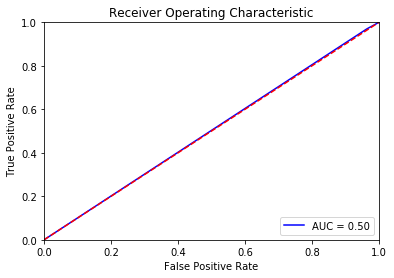

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, preds)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = clf.predict_proba(X)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# IsolationForest

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
#columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
#target = "Class"

#X = cardsdf[columns]
#Y = cardsdf[target]

# Define a random state 
state = np.random.RandomState(42)
n_outliers = len(Fraud)

#        clf.fit(X)
#        scores_prediction = clf.decision_function(X)
 #       y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    #y_pred[y_pred == 1] = 0
    #y_pred[y_pred == -1] = 1
    #n_errors = (y_pred != Y).sum()
    
clf = IsolationForest(n_estimators=1000, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=1).fit(X)
#scores_prediction = clf.decision_ function(X)
#preds = anomalydetector.predict(X)

y_pred = clf.predict(X)
    # Run Classification Metrics

y_pred = pd.Series([0 if y_pred[i] <= 0.5 else 1 for i in range(len(y_pred))])
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min finished


Accuracy Score :
0.002348959119684558
Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.00      0.00    284315
           1       0.00      0.68      0.00       492

    accuracy                           0.00    284807
   macro avg       0.34      0.34      0.00    284807
weighted avg       0.68      0.00      0.00    284807



In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred)

array([[   335, 283980],
       [   158,    334]], dtype=int64)

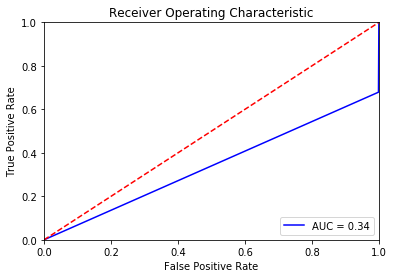

In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, y_pred)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = clf.predict_proba(X)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Sector Vector Machine

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

In [13]:
from sklearn import svm

#columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
#target = "Class"
# Define a random state 
state = np.random.RandomState(42)
#X = cardsdf[columns]
#Y = cardsdf[target]

# Define a random state 
state = np.random.RandomState(42)
n_outliers = len(Fraud)
clf = svm.SVC()
clf.fit(X,Y)
preds = clf.predict(X)
y_pred_temp = [0 if preds[i] <= 0.5 else 1 for i in range(len(preds))]

from sklearn.metrics import fbeta_score

print(fbeta_score(Y, y_pred_temp, average='weighted', beta=0.5))


0.9996694424176729


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,y_pred_temp)

array([[284305,     10],
       [    81,    411]], dtype=int64)

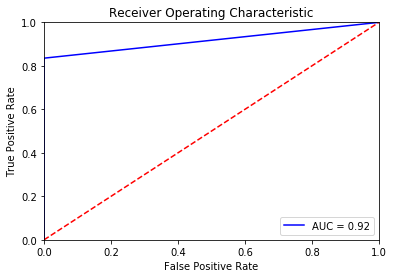

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, y_pred_temp)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = clf.predict_proba(X)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y, y_pred_temp)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
from sklearn.metrics import classification_report
print("Classification Report :")
print(classification_report(Y, y_pred_temp))


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.98      0.84      0.90       492

    accuracy                           1.00    284807
   macro avg       0.99      0.92      0.95    284807
weighted avg       1.00      1.00      1.00    284807



# KNeighborsClassifier

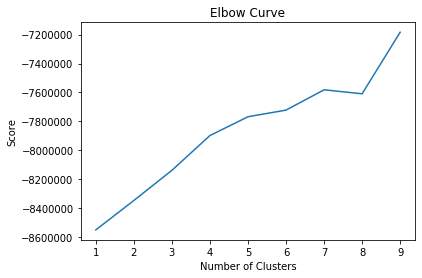

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])
from sklearn.cluster import MiniBatchKMeans
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
#target = "Class"

#X = cardsdf[columns]
#Y = cardsdf[target]

# Define a random state 
state = np.random.RandomState(42)
n_outliers = len(Fraud)
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X, Y)
preds = neigh.predict(X)
y_pred_temp = [0 if preds[i] <= 0.5 else 1 for i in range(len(preds))]


print("Accuracy Score:")
print(accuracy_score(Y,y_pred_temp))
print("Classification Report:")
print(classification_report(Y,y_pred_temp))



Accuracy Score:
0.9995575951433778
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.95      0.78      0.86       492

    accuracy                           1.00    284807
   macro avg       0.98      0.89      0.93    284807
weighted avg       1.00      1.00      1.00    284807



In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred_temp)

array([[284295,     20],
       [   106,    386]], dtype=int64)

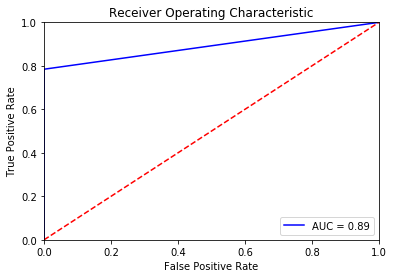

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, y_pred_temp )
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = clf.predict_proba(X)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y, y_pred_temp)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Autoencoder

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

Epoch 1/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 2/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 3/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 4/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 5/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 6/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 7/30
284807/284807 [==============================] - 1s 4us/sample - loss: 0.9983 - acc: 0.0017
Epoch 8/30
284807/284807 [==============================] - 1s 5us/sample - loss: 0.9983 - acc: 0.0017 0s - loss: 0.9984
Epoch 9/30
284807/284807 [==============================] - 1s 5us/sample - loss: 0.9983 - acc: 0.0017
Epoch 10/30
284807/284807 [============================

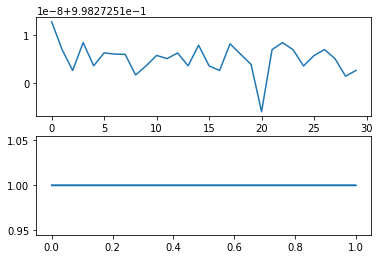

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import MeanSquaredError
model = Sequential()
# Add the first layer
model.add(Dense(units = X.shape[1], activation='elu'))
# Add the second layer
model.add(Dense(64, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(64, activation='elu'))
# Add the output layer
model.add(Dense(1, activation='softmax'))
# Compile the model
model.compile(optimizer = Adadelta(lr = 0.5), loss = MeanSquaredError(), metrics = ['accuracy'])
# Fit the model
history = model.fit(X, Y, batch_size = 10240, epochs = 30, verbose = 1)
y_pred = model.predict(X)
# Calculate predicted probability of survival: predicted_prob_true
#predicted_prob_true =  y_pred[:,1]
y_pred_temp = [0 if y_pred[i] <=0.5 else 1 for i in range(len(y_pred))]
roc_auc_score(Y, y_pred_temp)
#y_pred_temp = ([0 if y_pred[i] == 1 else 1 for i in range(len(y_pred))]).all()
# Plot the history
fig, ax = plt.subplots(2)
ax[0].plot(history.history['loss'])
ax[1].plot(Y, y_pred_temp )
plt.show()

we will get a high reconstruction loss value because the network failed to reconstruct the image/input that is considered an anomaly.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])



Testing model with learning rate: 0.000001



Testing model with learning rate: 0.010000



Testing model with learning rate: 1.000000

[[     0 284315]
 [     0    492]]


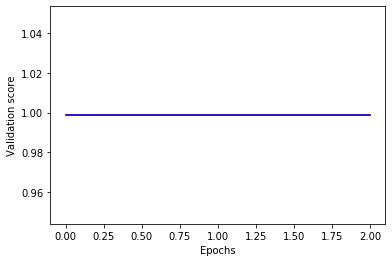

In [25]:
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.losses import MeanSquaredError
#columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
#target = "Class"
#target = to_categorical(Y)
#X =  np.array(cardsdf[columns])
#Y =  np.array(cardsdf[target])

# Define a random state 
#state = np.random.RandomState(42)
#n_outliers = len(Fraud)
lr_to_test = [.000001,0.01, 1]
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
model1 = Sequential()
# Add the first layer
model1.add(Dense(units = X.shape[1], activation='elu'))

# Add the second layer
model1.add(Dense(50, activation='elu'))

# Add the output layer
model1.add(Dense(1, activation='softmax'))
my_optimizer = SGD(lr=lr)
#Adadelta = keras.optimizers.Adadelta(lr=0.05, decay = 0.005)
# Compile the model
model1.compile(optimizer=my_optimizer, loss= MeanSquaredError(), metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
# Verify that model contains information from compiling
#print("Loss function: " + model1.loss)
# Fit the model
history1 = model1.fit(X, Y, batch_size = 10240, epochs = 100, verbose = False,validation_split=0.3,callbacks=[early_stopping_monitor])
# Calculate predictions: predictions
predictions1 = model1.predict(X)
# Calculate predicted probability of survival: predicted_prob_true
#predicted_prob_true1 =  predictions1[:,1]
y_pred_temp = [0 if predictions1[i] <= 0.5 else 1 for i in range(len(predictions1))]
#print(predicted_prob_true1)
model2 = Sequential()
# Add the first layer
model2.add(Dense(units = X.shape[1], activation='elu'))

# Add the second layer
model2.add(Dense(100, activation='elu'))
# Add the third layer
model2.add(Dense(100, activation='elu'))
model2.add(Dense(100, activation='elu'))
# Add the output layer
model2.add(Dense(1, activation='softmax'))
my_optimizer = SGD(lr=lr)
#Adadelta = keras.optimizers.Adadelta(lr=0.05, decay = 0.005)
# Compile the model
model2.compile(optimizer=my_optimizer, loss= MeanSquaredError(), metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
# Verify that model contains information from compiling
#print("Loss function: " + model2.loss)
# Fit the model
history2 = model2.fit(X, Y, batch_size = 10240, epochs = 100, verbose = False,validation_split=0.3,callbacks=[early_stopping_monitor])
# Calculate predictions: predictions
predictions2 = model2.predict(X)
y_pred_temp2 = [0 if predictions2[i] <= 0.5 else 1 for i in range(len(predictions2))]
print(confusion_matrix(Y, y_pred_temp2))
#fig, ax = plt.subplots()
#ax.plot(Y, y_pred_temp)
#plt.show()
# Create the plot
plt.plot(history1.history['val_loss'], 'r', history2.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

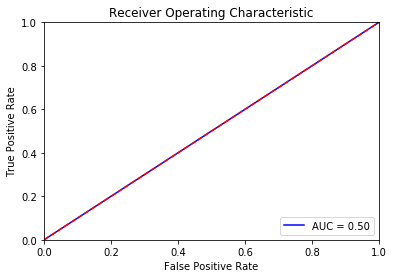

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

predictions1 = model1.predict(X)
# Calculate predicted probability of survival: predicted_prob_true
#predicted_prob_true1 =  predictions1[:,1]
y_pred_temp = [0 if predictions1[i] <=0.5 else 1 for i in range(len(predictions1))]
roc_auc_score(Y, y_pred_temp)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y, y_pred_temp)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

predictions2 = model2.predict(X)
# Calculate predicted probability of survival: predicted_prob_true
#predicted_prob_true2 =  predictions2[:,1]
y_pred_temp2 = [0 if predictions2[i] <=0.5 else 1 for i in range(len(predictions2))]
roc_auc_score(Y, y_pred_temp2)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y, y_pred_temp2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'model2' is not defined

In [ ]:
gg